In [75]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas_profiling import ProfileReport
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import pickle


In [76]:
'''
This function generates the training and testing dataset to be used for training and testing purposes with various models respectively. 
'''


def generate_train_test_data(split = 0.2, random_state = 42, scaling = 'standard', sampling = False, show_plots = True):

	'''
	This method generates the training and test data. 
	Parameters :- split : Float, (0,1) - fraction of size of testing data to be used to test the model.
				  random_state : Integer - state of the randomization of the sampling data.
				  scaling : String, 'normal_negative', 'normal_positive', 'standard' - Type of scaling to be used, scaling data by 
				  																		[-1,1], [0,1], Standard Normal respectively
				  sampling : Boolean - To generate synthetic data using training data with SMOTE
				  show_plots : Boolean - To show target variable distribution after each sampling method.											
	'''

	data = pd.read_csv('/content/drive/MyDrive/ML_Project/Dataset/raw.csv', index_col = [0])

	X = data[data.columns[0:100]]

	y = data['y']

	sns.countplot(y).set_title('Target Distribution in whole dataset')
	plt.show()

	X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, stratify = y, test_size = split)


	if scaling == 'normal_negative':
		scale = MinMaxScaler(feature_range = (-1,1))

	elif scaling == 'normal_positive':
		scale = MinMaxScaler()

	elif scaling == 'standard':
		scale = StandardScaler()

	if sampling == False:

		X_train = scale.fit_transform(X_train)
		X_test = scale.transform(X_test)

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset')
			plt.show()
			sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
			plt.show()

		return X_train, X_test, y_train, y_test

	else:

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset without SMOTE')
			plt.show()

		oversample = SMOTE()
		X_train, y_train = oversample.fit_resample(X_train, y_train)

		X_train = scale.fit_transform(X_train)
		X_test = scale.transform(X_test)

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset with SMOTE')
			plt.show()
			sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
			plt.show()
		return X_train, X_test, y_train, y_test





/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


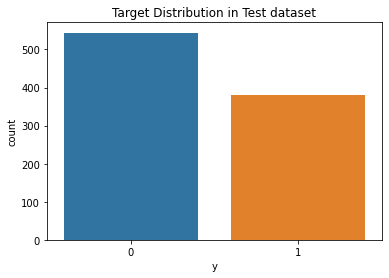

In [92]:
X_train, X_test, y_train, y_test = generate_train_test_data(split = 0.3,sampling = True)

In [93]:
pickle.dump(X_train,open('X_train','wb'))
pickle.dump(y_train,open('y_train','wb'))
pickle.dump(X_test,open('X_test','wb'))
pickle.dump(y_test,open('y_test','wb'))

In [94]:
with open("X_train", "br") as fh:
    X_train = pickle.load(fh)

with open("y_train", "br") as fh:
    y_train = pickle.load(fh)

with open("X_test", "br") as fh:
    X_test = pickle.load(fh)

with open("y_test", "br") as fh:
    y_test = pickle.load(fh)



In [95]:
sel = SelectKBest(f_classif, k=95)
X_train = sel.fit_transform(X_train, y_train)
X_test = sel.transform(X_test)

pca = PCA(n_components=70)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [96]:
pickle.dump(X_train,open("X_train_fs","wb"))
pickle.dump(X_test,open("X_test_fs","wb"))



In [91]:
X_train.shape

(762, 70)

# Model Training


In [65]:
#Logistic Regression
param_grid = {'penalty': ['l2'],
           'C': [0.01,0.1, 0.002, 0.05,0.5,1],
           'max_iter': [1000],'random_state':[0]
            
           }
scoring = ['roc_auc','accuracy','f1']

grid = GridSearchCV(LogisticRegression(), param_grid, verbose  = 1,refit = True)  
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.cv_results_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_val,y_val)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_val, grid.predict(X_val),average='macro'))




Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Params: 
{'mean_fit_time': array([0.00848002, 0.00944748, 0.0106977 , 0.01601982, 0.01106143]), 'std_fit_time': array([0.00035759, 0.00084468, 0.00023186, 0.00642132, 0.00055505]), 'mean_score_time': array([0.00052099, 0.00053749, 0.00057168, 0.00079117, 0.00053368]), 'std_score_time': array([2.20664864e-05, 1.26308754e-05, 2.73549970e-05, 4.54177859e-04,
       1.26146637e-05]), 'param_C': masked_array(data=[0.0005, 0.001, 0.002, 0.003, 0.004],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_iter': masked_array(data=[1000, 1000, 1000, 1000, 1000],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'l2'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_random_state': masked_array(data=[0, 0, 0, 0, 0],
             mask=[False, False, Fals

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


In [66]:
grid.best_params_

{'C': 0.003, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0}

In [ ]:
lr = LogisticRegression()

              precision    recall  f1-score   support

           0       0.76      0.40      0.53        87
           1       0.59      0.87      0.71        87

    accuracy                           0.64       174
   macro avg       0.68      0.64      0.62       174
weighted avg       0.68      0.64      0.62       174



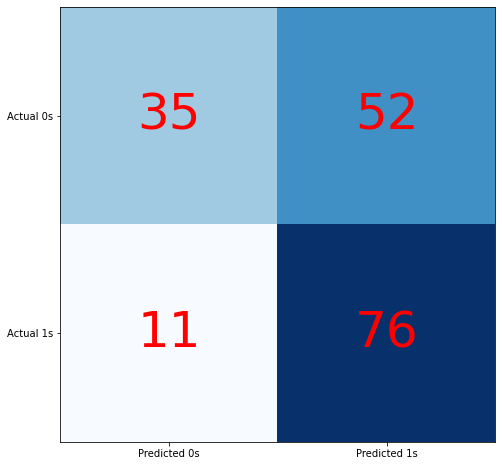

In [69]:
y_pred_lr = grid.predict(X_val)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_val, y_pred_lr)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()

print(classification_report(y_val, y_pred_lr))



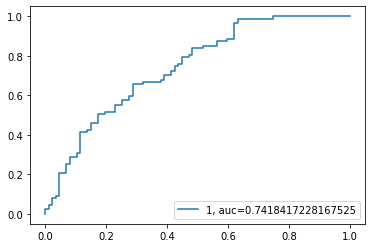

In [68]:
y_pred_proba = grid.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [73]:
#Random Forest Tree
from sklearn.ensemble import RandomForestClassifier

print('start')
param_grid = {'n_estimators': [300],
           'criterion': ['gini'],
              'max_depth': range(5, 100, 5),
              'min_samples_split': range(2, 10, 1),
              'max_features': ['auto'],
              'random_state':[0]
            
           }

grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose = 1, refit=True) 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.cv_results_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_val,y_val)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_val, grid.predict(X_val),average='macro'))
# dt = RandomForestClassifier(criterion ='entropy', max_depth = 10, max_features = 3, min_samples_split = 5, n_estimators= 10, bootstrap = True,  random_state = 0)
# dt.fit(X_train,y_train)

start
Fitting 5 folds for each of 152 candidates, totalling 760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed: 13.6min finished



Best Params: 
{'mean_fit_time': array([0.80713873, 0.79002204, 0.80155816, 0.81098089, 0.80385995,
       0.8007442 , 0.80040312, 0.78599572, 0.99332666, 0.99604182,
       1.00868435, 0.99458489, 0.98812208, 0.99007783, 0.98716297,
       1.00644403, 1.07312474, 1.05309663, 1.0529366 , 1.04181094,
       1.04598269, 1.05444303, 1.05472975, 1.03471489, 1.04591613,
       1.04057326, 1.0634871 , 1.07156849, 1.06364331, 1.04533525,
       1.08642206, 1.08648095, 1.05791426, 1.07190938, 1.061865  ,
       1.07064757, 1.04212809, 1.053299  , 1.06057544, 1.06486368,
       1.07203956, 1.07976923, 1.05399847, 1.0589426 , 1.05272775,
       1.03959985, 1.04828472, 1.03482327, 1.06353359, 1.08274603,
       1.08783507, 1.05823865, 1.06231761, 1.0615725 , 1.20160532,
       1.17552605, 1.09451389, 1.13538165, 1.05754323, 1.05772777,
       1.06221447, 1.04149752, 1.04581861, 1.03447595, 1.05442562,
       1.06478839, 1.07044964, 1.05343575, 1.05831709, 1.05350809,
       1.08273139, 1.0570055 

In [74]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 300,
 'random_state': 0}

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion' : ['gini', 'entropy'],
           'splitter': ['best','random'],
              'max_depth': range(5, 100, 5),
              'min_samples_split': range(5, 20, 2),
           'random_state':[0]
            
           }

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose = 1, refit=True) 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.cv_results_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_val,y_val)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_val, grid.predict(X_val),average='macro'))

In [ ]:
#SVM
print('start')
from sklearn.svm import SVC
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000],  
              'gamma': [10, 1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
           }

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose = 1, refit=True) 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.cv_results_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_val,y_val)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_val, grid.predict(X_val),average='macro'))

In [ ]:
#ADABOOST
print('start')
from sklearn.svm import SVC
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000],  
              'gamma': [10, 1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
           }

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose = 1, refit=True) 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.cv_results_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_val,y_val)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_val, grid.predict(X_val),average='macro'))

In [ ]:
#GBoost
from sklearn.ensemble import GradientBoostingClassifier
print('start')
from sklearn.svm import SVC
param_grid = {'n_estimators': [300, 400, 500],
              'criterion': ['friedman_mse', 'mse'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
              'loss': ['deviance', 'exponential']
              'random_state': [0]
           }

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose = 1, refit=True) 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.cv_results_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_val,y_val)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_val, grid.predict(X_val),average='macro'))
